# A Predictive Model on H1N1 Vaccine Uptake

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> **Problem Statement:** Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity." In [Katsiroumpa A. et al.,(2023)](https://www.mdpi.com/2076-393X/11/2/331) *Predictors of Seasonal Influenza Vaccination Willingness among High-Risk Populations-Three Years after the Onset of the COVID-19 Pandemic*, it was observed that a majority of the participants expressed reluctance or hesitation towards getting vaccinated.

> Vaccine hesitancy is a well-known phenomenon, and the [World Health Organization](https://www.annualreviews.org/doi/full/10.1146/annurev-publhealth-090419-102240) recognizes it as one of the top ten threats to global health. Various factors such as social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission may contribute to vaccine hesitancy. Having comprehensive knowledge of the traits linked to individuals' vaccination behavior can aid in the planning and implementation of future public health initiatives.

> **Main Objective:** The goal of this project is to build a predictive model determining whether people got H1N1 and seasonal flu vaccines using information shared about their backgrounds, opinions, and health behaviors.

### b) Defining the Metric for Success - WIP

The model will be considered a success if the developed predictive model is able to explain 80% of the variation of the target variable and have a an accuracy score of not less that 90%.

### c) Recording the Experimental Design 

1.Data Collection

2.Reading the Data 

3.Checking the Data 

4.External Data Source Validation

5.Data Cleaning

6.Exploratory Data Analysis

7.Data Modeling

8.Observations from the model

9.Conclusion

10.Recommendations

11.Future Improvement Ideas

### d) Data Understanding - WIP

*For all binary variables: 0 = No; 1 = Yes.*


| Variable Name | Description |
|:--- |:--- |
|h1n1_vaccine| Whether respondent received H1N1 flu vaccine.|
|seasonal_vaccine| Whether respondent received seasonal flu vaccine.|
|h1n1_concern| Level of concern about the H1N1 flu. **See d(i)**|
|h1n1_concern| Level of concern about the H1N1 flu.**See d(ii)**|
|h1n1_knowledge| Level of knowledge about H1N1 flu.**See d(iii)**|
|behavioral_antiviral_meds| Has taken antiviral medications. (binary)|
|behavioral_avoidance| Has avoided close contact with others with flu-like symptoms. (binary)|
|behavioral_face_mask| Has bought a face mask. (binary)|
|behavioral_wash_hands| Has frequently washed hands or used hand sanitizer. (binary)|
|behavioral_large_gatherings| Has reduced time at large gatherings. (binary)|
|behavioral_outside_home| Has reduced contact with people outside of own household. (binary)|
|behavioral_touch_face| Has avoided touching eyes, nose, or mouth. (binary)|
|doctor_recc_h1n1| H1N1 flu vaccine was recommended by doctor. (binary)|
|doctor_recc_seasonal| Seasonal flu vaccine was recommended by doctor. (binary)|
|chronic_med_condition| Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)|
|child_under_6_months| Has regular close contact with a child under the age of six months. (binary)|
|health_worker| Is a healthcare worker. (binary)|
|health_insurance| Has health insurance. (binary)|
|opinion_h1n1_vacc_effective| Respondent's opinion about H1N1 vaccine effectiveness.**See d(iv)**|
|opinion_h1n1_risk| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.**See d(v)**|
|opinion_h1n1_sick_from_vacc| Respondent's worry of getting sick from taking H1N1 vaccine.**See d(vi)**|
|opinion_seas_vacc_effective| Respondent's opinion about seasonal flu vaccine effectiveness.**See d(vii)**|
|opinion_seas_risk| Respondent's opinion about risk of getting sick with seasonal flu without vaccine.**See d(viii)**|
|opinion_seas_sick_from_vacc| Respondent's worry of getting sick from taking seasonal flu vaccine.**See d(ix)**|
|age_group| Age group of respondent.|
|education| Self-reported education level.|
|race| Race of respondent.|
|sex| Sex of respondent.|
|income_poverty| Household annual income of respondent with respect to 2008 Census poverty thresholds.|
|marital_status| Marital status of respondent.|
|rent_or_own| Housing situation of respondent.|
|employment_status| Employment status of respondent.|
|hhs_geo_region| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.|
|census_msa| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.|
|household_adults| Number of other adults in household, top-coded to 3.|
|household_children| Number of children in household, top-coded to 3.|
|employment_industry| Type of industry respondent is employed in. Values are represented as short random character strings.|
|employment_occupation| Type of occupation of respondent. Values are represented as short random character strings.|

| Key | Likert Rating Scale|
|:--- |:--- |
|**d(i)**| 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.|
|**d(ii)**| 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.|
|**d(iii)**| 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.|
|**d(iv)**| 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.|
|**d(v)**| 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.|
|**d(vi)**| 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.|
|**d(vii)**| 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.|
|**d(viii)**| 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.|
|**d(ix)**'| 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.|

## 2. Reading the Data

In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages (1.2.1)


In [2]:
# Loading the required libraries 

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy.stats import chi2_contingency
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import probplot

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report,confusion_matrix  
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data 

vaccine_df = pd.read_csv("training_set_features.csv")
vaccine_labels = pd.read_csv("training_set_labels.csv")

In [4]:
# Checking the shape of vaccine_df and vaccine_labels

print(vaccine_df.shape)
print(vaccine_labels.shape) 

(26707, 36)
(26707, 3)


Both the data sets contain similar number of rows, that is, 26,707. With this established, the data can easily be merged into one whole data frame containing the target and predictor variables. 

In [5]:
# Merging the two data frames and viewing the combined data frame

combined_df = vaccine_labels.merge(vaccine_df, how='right')
combined_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb




## 3. Checking the Data

In [6]:
# Determining the number of records in our dataset

print (f'The combined_df has {combined_df.shape[0]} rows and {combined_df.shape[1]} columns')

The combined_df has 26707 rows and 38 columns


In [7]:
# Previewing the top of our dataset

combined_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
# Previewing the bottom of our dataset

combined_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [9]:
# Checking whether each column has an appropriate datatype

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

It can be noted that some columns in combined_df contain null values. This will be tidied under data cleaning before any analysis is done. Additionally, the dataframe has a mix of integer, float, and object data types. The object data types will be encoded into numerical values before any modeling takes place.

In [10]:
# Checking the various statistical measures in the data frame

np.transpose(combined_df.describe())

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
seasonal_vaccine,26707.0,0.465608,0.498825,0.0,0.0,0.0,1.0,1.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0


## 4. External Data Source Validation

In [Katsiroumpa A. et al.,(2023)](https://www.mdpi.com/2076-393X/11/2/331) *Predictors of Seasonal Influenza Vaccination Willingness among High-Risk Populations-Three Years after the Onset of the COVID-19 Pandemic*, it was noted that among participants, 39.4% were willing to accept the seasonal influenza vaccine, 33.9%
were unwilling, and 26.8% were hesitant.

Below, the data set is analysed to establish the percentage uptake of both H1NI and Seasonal Flu vaccines. 

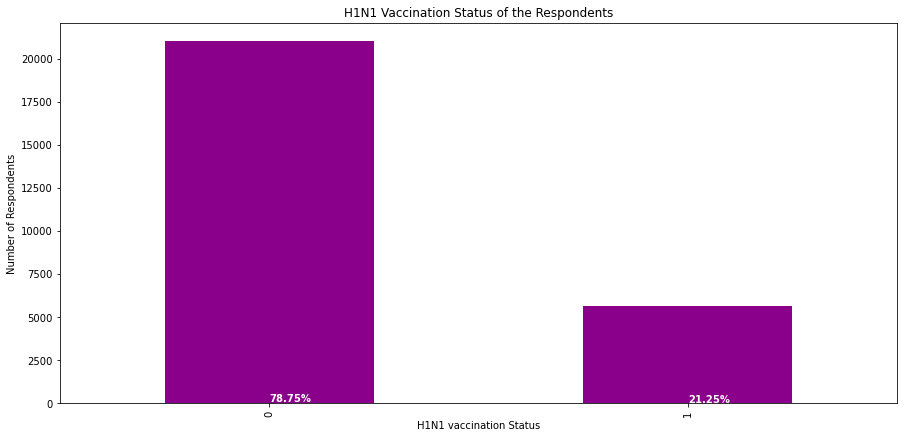

In [11]:
# Convert the h1n1_vaccine column to a pandas series
h1n1_data = pd.Series(combined_df["h1n1_vaccine"])

# Compute the frequency of each value
h1n1_frequency = combined_df["h1n1_vaccine"].value_counts()

# Calculate the proportion of each value in the data set
h1n1_proportion = h1n1_frequency / len(h1n1_data) * 100

# Plot the frequency of the values
ax = h1n1_frequency.plot(kind='bar', figsize =(15, 7), color='darkmagenta')

# Include the percentages to the bar graph
for i, m in enumerate(h1n1_proportion):
    ax.text(i, m + 3, str(np.round(m, 2)) + '%', color='white', fontweight='bold')
    
# Label the plot accoringly
plt.title('H1N1 Vaccination Status of the Respondents')
plt.xlabel('H1N1 vaccination Status')
plt.ylabel('Number of Respondents')

# Show the plot
plt.show()


From the plot above, it is observed that 78.75% of the respondents did not receive the H1N1 vaccination. 

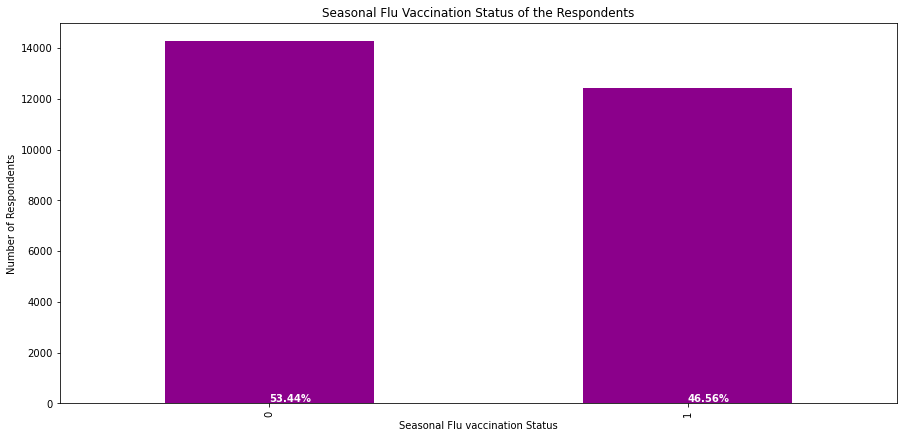

In [12]:
# Convert the seasonal_vaccine column to a pandas series
seasonal_data = pd.Series(combined_df["seasonal_vaccine"])

# Compute the frequency of each value
seasonal_frequency = combined_df["seasonal_vaccine"].value_counts()

# Calculate the proportion of each value in the data set
seasonal_proportion = seasonal_frequency / len(seasonal_data) * 100


# Plot the frequency of the values
ax = seasonal_frequency.plot(kind='bar', figsize =(15, 7), color='darkmagenta')

# Include the percentages to the bar graph
for i, z in enumerate(seasonal_proportion):
    ax.text(i, z + 3, str(np.round(z, 2)) + '%', color='white', fontweight='bold')
    
# Label the plot accoringly
plt.title('Seasonal Flu Vaccination Status of the Respondents')
plt.xlabel('Seasonal Flu vaccination Status')
plt.ylabel('Number of Respondents')

# Show the plot
plt.show()


Similarly, the Seasonal Flu Vaccine also showed that 53.44% of respondents were unvaccinated and 46.56% were vaccinated.


The plots align with the results of the research conducted by [Katsiroumpa A. et al.,(2023)](https://www.mdpi.com/2076-393X/11/2/331) on vaccine adoption in the Greek population. It is also worth mentioning that the study took demographic factors into account as possible predictors, which strengthens the data used in this analysis, which includes various demographic characteristics such as gender, age, number of children in the household, etc.





## 5. Tidying the Dataset

### 5.1 Missing Data 

It was noted earlier that there were some features with missing data.

In [13]:
# Identifying the Missing Data
combined_df.isna().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [14]:
# Calculating the percentage of missing values
percent_missing = combined_df.isnull().sum() * 100 / len(combined_df)
percent_missing.sort_values(ascending = False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

The computation shows that 50.44% of the data in the employment_occupation variable is missing, while 49.91% and 45.96% of the data in the employment_industry and health_insurance variables, respectively, are missing. These percentages are too high and no further information regarding the respondents can be found to replace this values. In this case, these variables will be dropped.

Moreover, the data in the income_poverty variable is missing for 16.56% of the respondents. Although this percentage is relatively low compared to the other variables mentioned, it is not possible to fill in the missing data as determining the respondents' income based on the established metrics (i.e., Below Poverty, <= 75,000, Above Poverty, > 75,000) could result in misclassification. This would have a negative effect on the performance of the model. This column will also be dropped. 

In [15]:
# Dropping columns with missing data greater than 10%

combined_df.drop(columns = ['employment_occupation', 'employment_industry',
                            'health_insurance','income_poverty'], inplace = True)
combined_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,12 Years,White,Male,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,College Graduate,White,Male,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Female,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Some College,White,Female,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [16]:
# Review remaining columns with null values 
null_review = pd.DataFrame(combined_df[['doctor_recc_h1n1','doctor_recc_seasonal','rent_or_own','employment_status',
                         'marital_status','education','chronic_med_condition','child_under_6_months',
                         'health_worker','opinion_seas_sick_from_vacc','opinion_seas_risk',
                          'opinion_seas_vacc_effective','opinion_h1n1_sick_from_vacc',
                          'opinion_h1n1_vacc_effective','opinion_h1n1_risk','household_children',
                          'household_adults','behavioral_avoidance','behavioral_touch_face',
                          'h1n1_knowledge', 'h1n1_concern','behavioral_large_gatherings',
                          'behavioral_outside_home','behavioral_antiviral_meds','behavioral_wash_hands',
                          'behavioral_face_mask']])

# Expanding the number of visible columns

pd.set_option('display.max_columns',50)

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

null_review.head()

,doctor_recc_h1n1,doctor_recc_seasonal,rent_or_own,employment_status,marital_status,education,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0.0,0.0,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,NaN,NaN,Own,Employed,Not Married,College Graduate,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,Rent,Not in Labor Force,Not Married,12 Years,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,Own,Employed,Married,Some College,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


From reviewing the null_review data frame above it can be noted that from the 26 columns, 4 contain categorical data while 22 contain numerical data. To deal with the null values, "Missing" shall be used in the categorical data to replace null values while the mode of the different categories will be used in the colums with numerical data. 

In [17]:
# Creating a data frame for the numerical columns

null_numerical = pd.DataFrame(combined_df[['doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition','child_under_6_months',
                         'health_worker','opinion_seas_sick_from_vacc','opinion_seas_risk',
                          'opinion_seas_vacc_effective','opinion_h1n1_sick_from_vacc',
                          'opinion_h1n1_vacc_effective','opinion_h1n1_risk','household_children',
                          'household_adults','behavioral_avoidance','behavioral_touch_face',
                          'h1n1_knowledge', 'h1n1_concern','behavioral_large_gatherings',
                          'behavioral_outside_home','behavioral_antiviral_meds','behavioral_wash_hands',
                          'behavioral_face_mask']])

null_numerical.head()

,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,NaN,NaN,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Finding and replacing null values with the mode

numerical_mode = null_numerical.mode().iloc[0]
null_numerical.fillna(numerical_mode, inplace=True)

# Checking that all null values are filled
null_numerical.isna().sum()

doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
household_children             0
household_adults               0
behavioral_avoidance           0
behavioral_touch_face          0
h1n1_knowledge                 0
h1n1_concern                   0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_antiviral_meds      0
behavioral_wash_hands          0
behavioral_face_mask           0
dtype: int64

In [19]:
# Creating a data frame for some of the categorical columns

null_categorical = pd.DataFrame(combined_df[['employment_status',
                         'marital_status','education']])
null_categorical.head()

,employment_status,marital_status,education
0,Not in Labor Force,Not Married,< 12 Years
1,Employed,Not Married,12 Years
2,Employed,Not Married,College Graduate
3,Not in Labor Force,Not Married,12 Years
4,Employed,Married,Some College


In [20]:
# Replacing null categorical values with missing 

null_categorical.fillna(value = 'Missing', inplace = True)
null_categorical.isna().sum()

employment_status    0
marital_status       0
education            0
dtype: int64

It will be noted that column rent_or_own was not included in the categorical data frame. Before filling the null values it would be important to check if a relationship exists between this column and the employment_status of a respondednt. This way, the value used to fill in can be representative to the actual situation. 

In [21]:
# Checking if a correlation exist between rent_or_own and employment_status
# Create a contingency table of the two categorical variables

contingency_table = pd.crosstab(null_categorical['employment_status'], combined_df['rent_or_own'])

print(contingency_table)

# Calculate the chi-squared statistic
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the result
print("Chi-Squared Statistic:", chi2)

print("p-value:", p)

rent_or_own           Own  Rent
employment_status              
Employed            10326  2914
Missing                77    30
Not in Labor Force   7519  2401
Unemployed            814   584
Chi-Squared Statistic: 271.7708239571285
p-value: 1.2774566548493485e-58


From the above, it is noted that the Chi-Squared Statistic is 271.77 and the p-value is 1.27. Since the p-value is grater that 0.05 this indicates that the relationship between the two variables is not statistically significant. From this and the chi-squared test, it can be concluded that there is no strong association between the two categorical variables and one cannot be used to predict the other. With this, the null values of the rent_or_own will be replaced with "Missing" as well. 

In [22]:
# Consolidating the categorical columns

null_categorical = pd.DataFrame(combined_df[['rent_or_own','employment_status',
                         'marital_status','education']])
null_categorical.fillna(value = 'Missing', inplace = True)
null_categorical.isna().sum()

rent_or_own          0
employment_status    0
marital_status       0
education            0
dtype: int64

In [23]:
# Creating a data frame for columns with non-null values

nonnull_pd = pd.DataFrame(combined_df[['respondent_id','seasonal_vaccine','h1n1_vaccine','sex','race',
                                       'census_msa','age_group','hhs_geo_region']])
nonnull_pd.head()

,respondent_id,seasonal_vaccine,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region
0,0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf
1,1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj
2,2,0,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun
3,3,1,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp
4,4,0,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun


In [24]:
# Conctenating the numerical and categorical data frame

complete_df = pd.DataFrame(pd.concat([nonnull_pd, null_categorical, null_numerical], axis=1))
complete_df.head()

,respondent_id,seasonal_vaccine,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,2,0,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun,Own,Employed,Not Married,College Graduate,0.0,0.0,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4,0,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


In [25]:
# Confirming all null values have been cleaned

print(complete_df.isna().sum())

respondent_id                  0
seasonal_vaccine               0
h1n1_vaccine                   0
sex                            0
race                           0
census_msa                     0
age_group                      0
hhs_geo_region                 0
rent_or_own                    0
employment_status              0
marital_status                 0
education                      0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
household_children             0
household_adults               0
behavioral_avoidance           0
behavioral_touch_face          0
h1n1_knowledge                 0
h1n1_concern                   0
behavioral_large_gatherings    0
behavioral

### 5.2 Duplicated Data 

In [26]:
# Check for duplicated rows

complete_df.duplicated().any()

False

In [27]:
# Identifying the Duplicates
duplicated_values = complete_df[complete_df.duplicated(keep = False)]
duplicated_values.shape

(0, 34)

In [28]:
# Drop duplicated row
complete_df.drop_duplicates(inplace = True)

# Confirm that duplicated row has been deleted
complete_df.shape

(26707, 34)

In [29]:
complete_df.head()

,respondent_id,seasonal_vaccine,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,2,0,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun,Own,Employed,Not Married,College Graduate,0.0,0.0,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4,0,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


### 5.3 Target Variable Selection

The data set contains two target variables that is, h1n1_vaccine and seasonal_vaccine. For this model, h1n1_vaccine will be the target variable. In this case, all columns relating to seasonal_vaccine will be dropped as they will not be used in the model development.

In [30]:
# Dropping all columns relating to seasonal_vaccine 

complete_df = complete_df.drop(columns = ['seasonal_vaccine','doctor_recc_seasonal','opinion_seas_vacc_effective',
                                                'opinion_seas_risk','opinion_seas_sick_from_vacc'], inplace = False)
complete_df.shape

(26707, 29)

In [31]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   sex                          26707 non-null  object 
 3   race                         26707 non-null  object 
 4   census_msa                   26707 non-null  object 
 5   age_group                    26707 non-null  object 
 6   hhs_geo_region               26707 non-null  object 
 7   rent_or_own                  26707 non-null  object 
 8   employment_status            26707 non-null  object 
 9   marital_status               26707 non-null  object 
 10  education                    26707 non-null  object 
 11  doctor_recc_h1n1             26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

## 6. Exploratory Data Analysis

In [32]:
# Checking the various statistical measures in the data frame

np.transpose(complete_df.describe())

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
doctor_recc_h1n1,26707.0,0.202494,0.401866,0.0,0.0,0.0,0.0,1.0
chronic_med_condition,26707.0,0.272962,0.445490,0.0,0.0,0.0,1.0,1.0
child_under_6_months,26707.0,0.080054,0.271382,0.0,0.0,0.0,0.0,1.0
health_worker,26707.0,0.108548,0.311077,0.0,0.0,0.0,0.0,1.0
opinion_h1n1_sick_from_vacc,26707.0,2.352380,1.353339,1.0,1.0,2.0,4.0,5.0
opinion_h1n1_vacc_effective,26707.0,3.852810,1.000195,1.0,3.0,4.0,5.0,5.0
opinion_h1n1_risk,26707.0,2.337589,1.276825,1.0,1.0,2.0,4.0,5.0
household_children,26707.0,0.529599,0.925264,0.0,0.0,0.0,1.0,3.0


### 6.1 Univariate Analysis

Text(0.5, 1.0, 'Distribution H1N1 vaccine uptake')

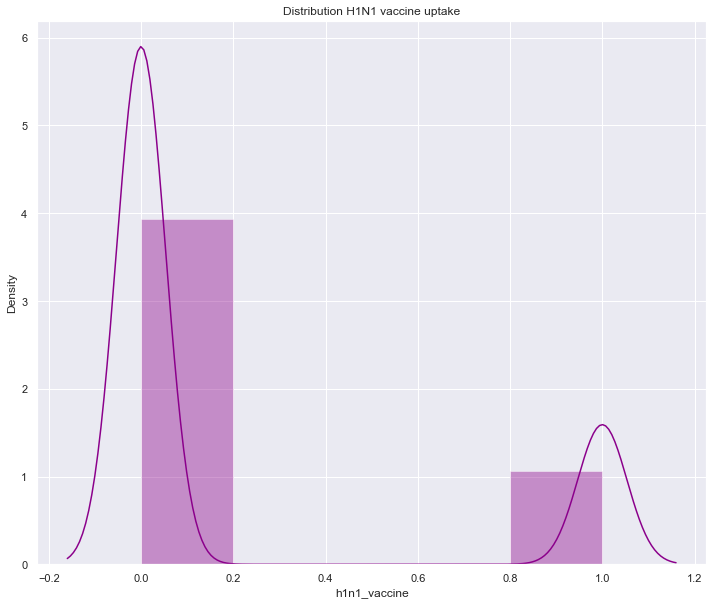

In [33]:
sns.set(rc={'figure.figsize':(12,10)})
univariate_plot = sns.distplot(complete_df['h1n1_vaccine'], color='darkmagenta', bins = 5)
univariate_plot.set_title( "Distribution H1N1 vaccine uptake")

In [34]:
# Checking for skewness and kurtosis

print(f"The target variable has a skewness of {(skew(complete_df['h1n1_vaccine']))}.")
print(f"The target variable has a kurtosis of {(kurtosis(complete_df['h1n1_vaccine']))}.")

The target variable has a skewness of 1.4059428379897505.
The target variable has a kurtosis of -0.02332473630532572.


The target variable only has two unique values, that is, 1 and 0 hence the distribution above. It can however be noted that the mode is **0** and both unique values have a normal distribution. 

Additionally, it can be noted that the target variable has a skewness of 1.406 meaning that it is positively skewed while the kurtosis of -0.02 indicates that the variable is mesokurtic as this figure is very close to zero.

### 6.2 Bivariate Analysis

### 6.2.1 Does the sex of a respondent determine H1N1 vaccine uptake?

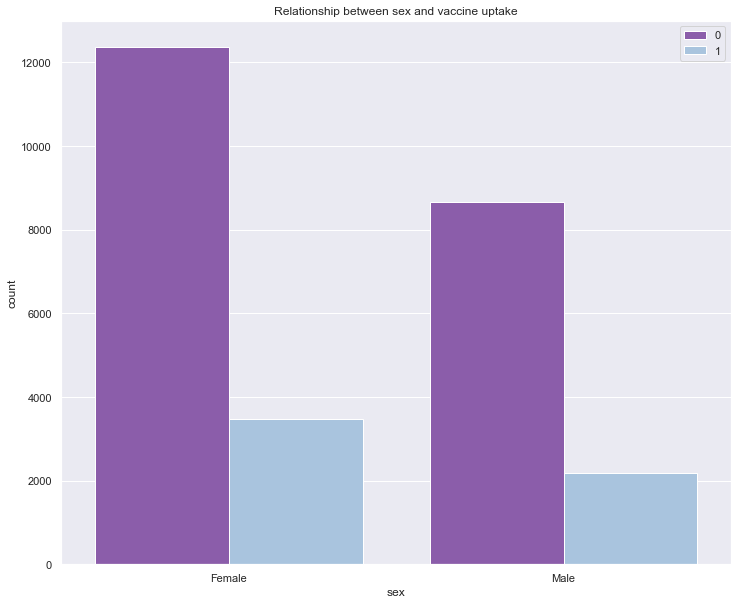

In [35]:
# Plotting a bar graph to show various gender uptake of H1N1 vaccine 

fig, ax = plt.subplots(figsize = (12,10))

sns.countplot(data = complete_df, x ='sex', hue ='h1n1_vaccine',orient ='v', palette='BuPu_r',saturation=10)

ax.set_title('Relationship between sex and vaccine uptake')
ax.legend(loc = 'upper right')

From the plot above, it can be noted that out of the vaccinated repondents, about 12,500 **(47%)** females are not vaccinated while 3,500 **(13%)** are vaccinated. On the other hand, 8,500 **(32%)** on males are unvaccinated while 2,100 **(8%)** are vaccinated.  

### 6.2.2 Does the race of a respondent determine H1N1 vaccine uptake?

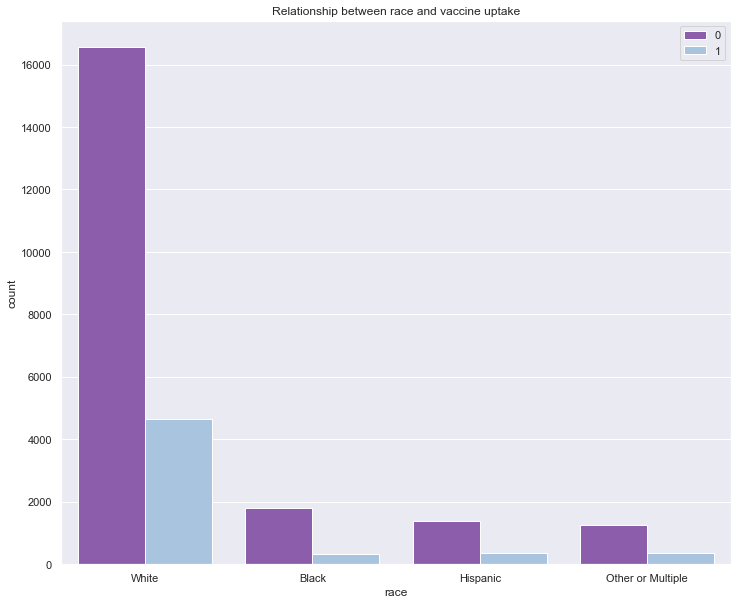

In [36]:
# Plotting a bar graph to show various race's uptake of H1N1 vaccine 

fig, ax = plt.subplots(figsize = (12,10))

order = ['White', 'Black', 'Hispanic', 'Other or Multiple']
sns.countplot(data = complete_df, x ='race', hue ='h1n1_vaccine',orient ='v', order = order, palette='BuPu_r',saturation=10)

ax.set_title('Relationship between race and vaccine uptake')
ax.legend(loc = 'upper right')

The graph reveals that the largest group of both unvaccinated and vaccinated individuals are white respondents, with 16,500 **(62%)** unvaccinated and 4,500 **(17%)** vaccinated. Additionally, the graph depicts that among 2,100 black individuals, 1,800 **(7%)** have not received the vaccine, while 250 **(1%)** have. Furthermore, the plot shows that there are 1,300 **(5%)** unvaccinated and 400 **(1.5%)** vaccinated Hispanic individuals. The rest of the 1,700 **(6.5%)** individuals belong to other races, with 1,300 **(5%)** being not vaccinated and 400 **(1.5%)** are vaccinated agains H1N1.

### 6.2.3 Does the age-group of a respondent determine H1N1 vaccine uptake?

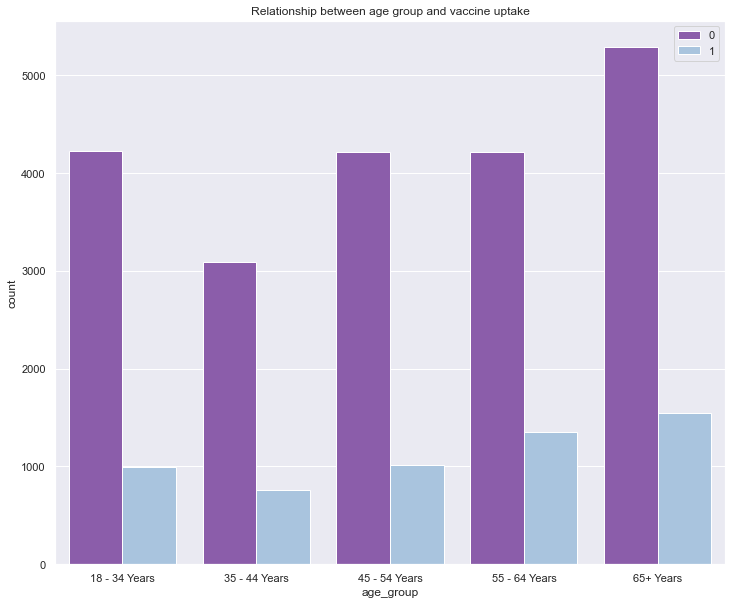

In [37]:
# Plotting a bar graph to show various age-groups uptake of H1N1 vaccine 

fig, ax = plt.subplots(figsize = (12,10))
order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']

sns.countplot(data = complete_df, x ='age_group', hue ='h1n1_vaccine',orient ='v',order = order,
              palette='BuPu_r',saturation=10)

ax.set_title('Relationship between age group and vaccine uptake')
ax.legend(loc = 'upper right')

The plot above indicates that the group with both the largest unvaccinated 1,600 **(6%)** and vaccinated 5,300 **(20%)** individuals are 65+ Years. This is followed and tied by by age groups 18 - 34 Years, 45 - 54 Years and 55 - 64 Years, all having 4,200 **(16%)** unvacinated individuals. Age group 35 - 44 Years has both the least number of vaccinated and unvaccinated responednts at 3,100 **(11.5%)** and 800 **(3%)** respectively. 

### 6.2.4 Does the employment_status of a respondent determine H1N1 vaccine uptake?

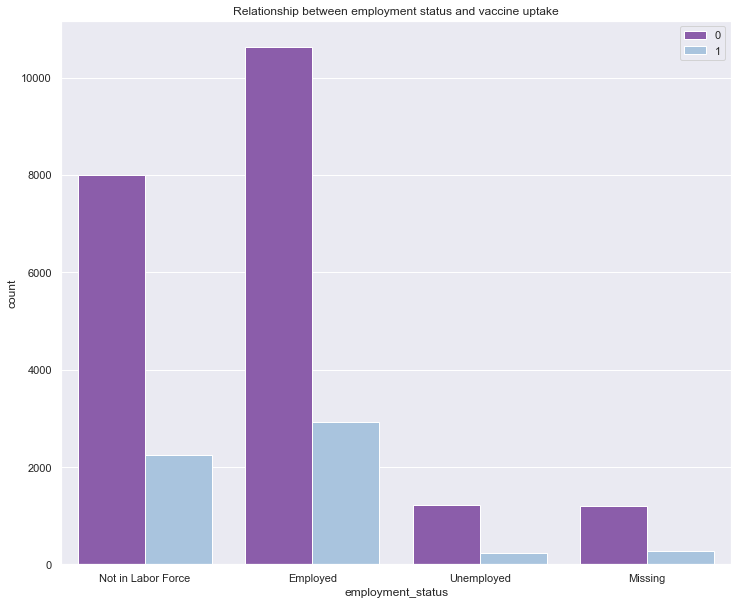

In [38]:
# Plotting a bar graph to show a respondents employment_status vs their uptake of H1N1 vaccine 

fig, ax = plt.subplots(figsize = (12,10))

sns.countplot(data = complete_df, x ='employment_status', hue ='h1n1_vaccine',orient ='v', palette='BuPu_r',saturation=10)

ax.set_title('Relationship between employment status and vaccine uptake')
ax.legend(loc = 'upper right')

In the graph above, employed respondents have the highest number of unvaccinated and vaccinated individuals at 10,600 **(40%)** and 2,900 **(11%)** respectively. This is followed by respondents who are not in the labor force with 8,000 **(30%)** unvacinated and 2,300 **(8.5%)** vaccinated individuals. Latsly, out of the unemployed inviduals 1,200 **(4.5%)** have not been vaccinated while 250 **(1%)** have.

### 6.2.5 Does the marital_status of a respondent determine H1N1 vaccine uptake?

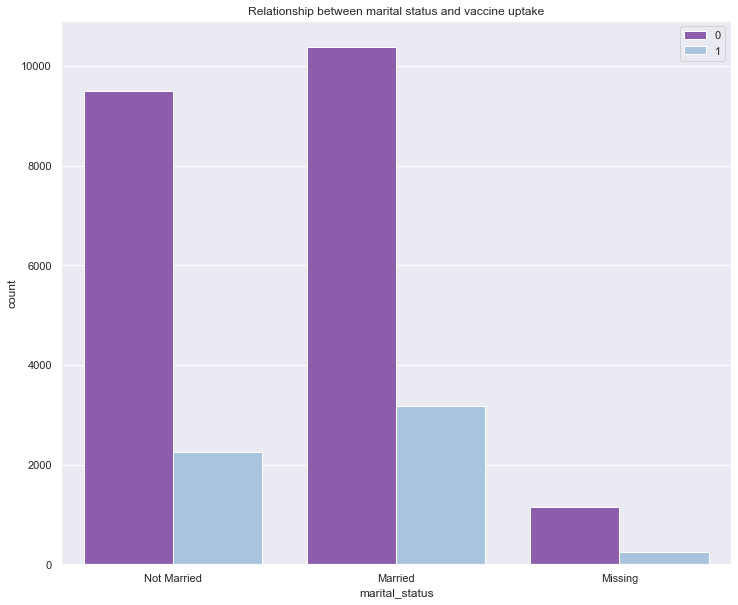

In [39]:
# Plotting a bar graph to show a respondents marital_status vs their uptake of H1N1 vaccine 

fig, ax = plt.subplots(figsize = (12,10))

sns.countplot(data = complete_df, x ='marital_status', hue ='h1n1_vaccine', orient ='v', palette='BuPu_r',saturation=10)

ax.set_title('Relationship between marital status and vaccine uptake')
ax.legend(loc = 'upper right')

This last bivariate graph shows that for both married and non married respondents most are not vaccinated. This consists of 13,600 **(51%)** married respondents 10,400 **(39%)** of which are not vaccinated while 3,200 **(12%)** are vaccinated. On the other hand only 2,300 **(8.5%)** of invidividuals who are not married are vaccinated while 9,500 **(35.5)** are not vaccinated from H1N1. The marital status of the remaining 1,300 **(5%)** could not be determined.  

## 7. Data Modeling

### 7.1 Pre Processing

In machine learning and data analysis, feature selection is the process of selecting a subset of the most important features or variables from a larger set of features. By deleting noisy, redundant, or irrelevant characteristics from the data, feature selection aims to improve the performance of machine learning systems.

This data set contains 24 predictor variables. In order to get the best information out of the modeling process a heatmap is presented in order to identify highly correlated variables as this could highlight which variables are similar and thus redundant. Such variables, if any will be dropped. 

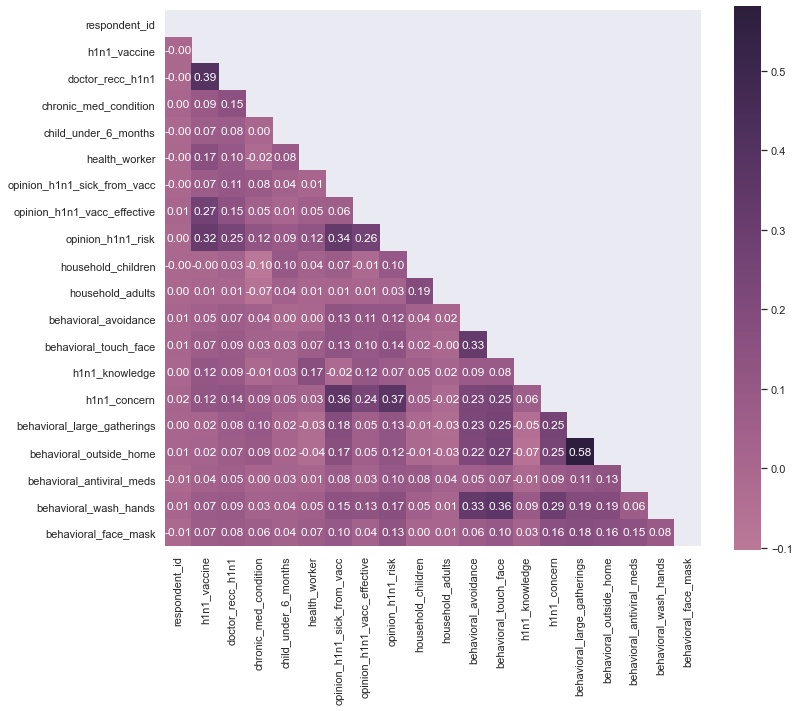

In [40]:
# Checking for perfectly correlated variables 
# Plotting a heatmap to show the correlation between target and predictor variables

df_correlation = complete_df.corr()

mask = np.triu(np.ones_like(df_correlation, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)

sns.cubehelix_palette

plt.figure(figsize=(12,10))
sns.heatmap(df_correlation, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=sns.cubehelix_palette(as_cmap=True))

plt.show();

**Observations from the heatmap:**

i. The highest positively correlated variables are behavioral_large_gatherings vs behavioral_outside_home at **0.58**, followed by h1n1_vaccine vs doctor_recc_h1n1 at **0.39**.

ii. The highest negatively correlated variables are chronic_med_condition vs household_children at **-0.10.**

The correlations for each of the variables above are not high enough to conclude redundancy or similarities between them. Thus, no variable will be dropped on this basis however, there are some columns which are not important for this modeling. The dataframe is reviewed below.

In [41]:
# Review data frame to identify unecessary columns

complete_df.head()

,respondent_id,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,2,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun,Own,Employed,Not Married,College Graduate,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


In [42]:
# Dropping unecessary columns and features with low correlation with target variable

complete_df = complete_df.drop(columns = ['respondent_id','census_msa',
                                          'hhs_geo_region','household_children',
                                          'household_adults','behavioral_large_gatherings',
                                          'behavioral_outside_home','behavioral_antiviral_meds',
                                         'behavioral_avoidance','behavioral_touch_face',
                                          'behavioral_wash_hands','behavioral_face_mask'], inplace = False)
complete_df.head()

,h1n1_vaccine,sex,race,age_group,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,h1n1_knowledge,h1n1_concern
0,0,Female,White,55 - 64 Years,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0
1,0,Male,White,35 - 44 Years,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,4.0,5.0,4.0,2.0,3.0
2,0,Male,White,18 - 34 Years,Own,Employed,Not Married,College Graduate,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0
3,0,Female,White,65+ Years,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,0.0,0.0,5.0,3.0,3.0,1.0,1.0
4,0,Female,White,45 - 54 Years,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,2.0


Now that the unecessary columns have been dropped it can be noted that the data frame contains 7 columns with categorical data. For purposes of building this model, these columns will be encoded using ordinal encoding as they comprise of grouped data. 

In [43]:
# Checking for unique values in the categorical data 

print("The sex column has",(complete_df['sex'].unique()).shape[0],(complete_df['sex'].unique()),"unique values.")
print("The race column has",(complete_df['race'].unique()).shape[0],(complete_df['race'].unique()),"unique values.")
print("The age_group column has",(complete_df['age_group'].unique()).shape[0],(complete_df['age_group'].unique()),"unique values.")
print("The rent_or_own column has",(complete_df['rent_or_own'].unique()).shape[0],(complete_df['rent_or_own'].unique()),"unique values.")
print("The employment_status column has",(complete_df['employment_status'].unique()).shape[0],(complete_df['employment_status'].unique()),"unique values.")
print("The marital_status column has",(complete_df['marital_status'].unique()).shape[0],(complete_df['marital_status'].unique()),"unique values.")
print("The education column has",(complete_df['education'].unique()).shape[0],(complete_df['education'].unique()),"unique values.")

The sex column has 2 ['Female' 'Male'] unique values.
The race column has 4 ['White' 'Black' 'Other or Multiple' 'Hispanic'] unique values.
The age_group column has 5 ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years'] unique values.
The rent_or_own column has 3 ['Own' 'Rent' 'Missing'] unique values.
The employment_status column has 4 ['Not in Labor Force' 'Employed' 'Unemployed' 'Missing'] unique values.
The marital_status column has 3 ['Not Married' 'Married' 'Missing'] unique values.
The education column has 5 ['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'Missing'] unique values.


In [44]:
# Encoding categorical variables in the dataset using ordinal encoding

encoded_df = pd.DataFrame({'sex': ['Female','Male','Female','Male','Female'],
                           'race': ['White','Black','Other or Multiple','Hispanic','White',],
                           'age_group': ['18 - 34 Years','35 - 44 Years', '45 - 54 Years','55 - 64 Years','65+ Years'],
                           'rent_or_own': ['Own','Rent','Missing','Own','Rent'],
                           'employment_status': ['Not in Labor Force','Employed','Unemployed','Missing','Not in Labor Force'],
                           'marital_status': ['Not Married','Married','Missing','Not Married','Married'],
                           'education': ['< 12 Years','12 Years','College Graduate','Some College','Missing']})

# Define the mappings of the categorical values to numerical values for each categorical column
mapping1 = {'Female': 0, 'Male': 1}
mapping2 = {'White': 0, 'Black': 1, 'Hispanic': 2,'Other or Multiple': 3}
mapping3 = {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years':3,'65+ Years':4}
mapping4 = {'Own': 0, 'Rent': 1, 'Missing': 2}
mapping5 = {'Not in Labor Force':0,'Employed': 1, 'Unemployed': 2, 'Missing': 3}
mapping6 = {'Not Married': 0,'Married': 1, 'Missing': 2}
mapping7 = {'< 12 Years':0,'12 Years': 1, 'College Graduate': 2, 'Some College': 3, 'Missing':4}                                         
                                         
# Apply the mappings to each categorical column 
# Replacing categorical columns with the encoded columns in the data frame 
complete_df['sex'] = complete_df['sex'].map(mapping1).fillna(0).astype(int)
complete_df['race'] = complete_df['race'].map(mapping2).fillna(0).astype(int)
complete_df['age_group'] = complete_df['age_group'].map(mapping3).fillna(0).astype(int)
complete_df['rent_or_own'] = complete_df['rent_or_own'].map(mapping4).fillna(0).astype(int)
complete_df['employment_status'] = complete_df['employment_status'].map(mapping5).fillna(0).astype(int)                                       
complete_df['marital_status'] = complete_df['marital_status'].map(mapping6).fillna(0).astype(int)
complete_df['education'] = complete_df['education'].map(mapping7).fillna(0).astype(int)
                                         
complete_df.head()


,h1n1_vaccine,sex,race,age_group,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,h1n1_knowledge,h1n1_concern
0,0,0,0,3,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0
1,0,1,0,1,1,1,0,1,0.0,0.0,0.0,0.0,4.0,5.0,4.0,2.0,3.0
2,0,1,0,0,0,1,0,2,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0
3,0,0,0,4,1,0,0,1,0.0,1.0,0.0,0.0,5.0,3.0,3.0,1.0,1.0
4,0,0,0,2,0,1,1,3,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,2.0


While the categorical data above has been encoded, it contains values from 0-4. It would be important to standardize then regularize the categorical data to deal with the hierachical issues that arise with encoding categorical data. This will ensure that value 0, 1, 2, 3 from the same column will be viewed as equal and given the same importance when included in the model. 
The regularisation will be done using Lasso Regression later on.

In [45]:
# Scaling the dataframe with an encoded categorical column
scaled_categorical = pd.DataFrame({'sex': [0, 1, 0, 1, 0],'race': [0, 1, 2, 3, 0],'age_group': [0, 1, 2, 3, 4],
                                  'rent_or_own': [0, 1, 2, 0, 1],'employment_status': [0, 1, 2, 3, 0],
                                   'marital_status': [0, 1, 2, 0, 1],'education': [0, 1, 2, 3, 4]})
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
complete_df['sex'] = scaler.fit_transform(complete_df[['sex']])
complete_df['race'] = scaler.fit_transform(complete_df[['race']])
complete_df['age_group'] = scaler.fit_transform(complete_df[['age_group']])
complete_df['rent_or_own'] = scaler.fit_transform(complete_df[['rent_or_own']])
complete_df['employment_status'] = scaler.fit_transform(complete_df[['employment_status']])
complete_df['marital_status'] = scaler.fit_transform(complete_df[['marital_status']])
complete_df['education'] = scaler.fit_transform(complete_df[['education']])
scaled_cat_df = complete_df.iloc [:,:7]
scaled_cat_df.head()

,h1n1_vaccine,sex,race,age_group,rent_or_own,employment_status,marital_status
0,0,0.0,0.0,0.75,0.0,0.000000,0.0
1,0,1.0,0.0,0.25,0.5,0.333333,0.0
2,0,1.0,0.0,0.00,0.0,0.333333,0.0
3,0,0.0,0.0,1.00,0.5,0.000000,0.0
4,0,0.0,0.0,0.50,0.0,0.333333,0.5


In [46]:
complete_df.head()

,h1n1_vaccine,sex,race,age_group,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,h1n1_knowledge,h1n1_concern
0,0,0.0,0.0,0.75,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0
1,0,1.0,0.0,0.25,0.5,0.333333,0.0,0.25,0.0,0.0,0.0,0.0,4.0,5.0,4.0,2.0,3.0
2,0,1.0,0.0,0.00,0.0,0.333333,0.0,0.50,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0
3,0,0.0,0.0,1.00,0.5,0.000000,0.0,0.25,0.0,1.0,0.0,0.0,5.0,3.0,3.0,1.0,1.0
4,0,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,2.0


In [47]:
# Defining the target and features from the data frame

target = complete_df['h1n1_vaccine']
features = complete_df.drop(columns='h1n1_vaccine')

In [48]:
# Split the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 19, test_size=0.2)

In [49]:
# Creating a data frame for the categorical data 

X_train_cat = pd.DataFrame(X_train[['sex', 'race', 'age_group', 'rent_or_own', 'employment_status', 'marital_status','education']])
X_test_cat = pd.DataFrame(X_test[['sex', 'race', 'age_group', 'rent_or_own', 'employment_status', 'marital_status','education']])

In [50]:
#Initialize the scaler
scaler = StandardScaler()


# Scale every feature except the target and categorical columns 
transformed_training_num = scaler.fit_transform(X_train.iloc[:,7:]) 
transformed_testing_num = scaler.transform(X_test.iloc[:,7:])

# Convert the scaled features into a DataFrame
X_train_transformed_num = pd.DataFrame(scaler.transform(X_train.iloc[:,7:]), 
                                   columns=X_train.columns[7:], 
                                   index=X_train.index)
X_test_transformed_num = pd.DataFrame(scaler.transform(X_test.iloc[:,7:]), 
                                  columns=X_train.columns[7:], 
                                  index=X_test.index)


X_train_transformed_num.head()

,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,h1n1_knowledge,h1n1_concern
4879,-0.504019,-0.611880,-0.293926,-0.346232,-0.995293,0.152660,-1.044435,1.194878,0.423069
1420,-0.504019,-0.611880,-0.293926,2.888240,-0.256149,0.152660,-0.258995,-0.425366,-0.676282
6649,-0.504019,1.634308,-0.293926,-0.346232,1.222139,1.144927,2.097325,-0.425366,1.522419
15177,-0.504019,-0.611880,3.402212,-0.346232,-0.995293,0.152660,-1.044435,-0.425366,0.423069
16273,-0.504019,-0.611880,-0.293926,-0.346232,-0.995293,-1.831874,-0.258995,1.194878,-0.676282


In [51]:
# Conactinating the numerical and categorical scaled data frames
complete_X_train_transformed = pd.DataFrame(pd.concat([X_train_cat, X_train_transformed_num], axis=1))
complete_X_test_transformed = pd.DataFrame(pd.concat([X_test_cat, X_test_transformed_num], axis=1))

The data frame above is complete and will be used to create the models in the next steps.

### 7.2 Decision Tree

In [52]:
# Training a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=10)  
dt_classifier.fit(complete_X_train_transformed, y_train) 

DecisionTreeClassifier(random_state=10)

In [53]:
# Make predictions for test data
y_pred = dt_classifier.predict(complete_X_test_transformed)  
print(classification_report(y_test,y_pred))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4194
           1       0.44      0.43      0.44      1148

    accuracy                           0.76      5342
   macro avg       0.65      0.64      0.64      5342
weighted avg       0.76      0.76      0.76      5342


Confusion Matrix
----------------
[[3570  624]
 [ 649  499]]


The baseline model has an accuracy score of 76% is not too bad as it states that 76% of the data was correctly predicted. Additionally, the recall is 64%, precision 65% and f1 score 64%. These scores can however be improved by tuning some hyperparameters in the decision tree classifier. 

In [54]:
# Using GridSearchCV to tune the decision tree's hyperparamenters

param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf' : range(1,10),}

gs_tree = GridSearchCV(dt_classifier, param_grid, cv=5)
gs_tree.fit(complete_X_train_transformed, y_train)

gs_tree.best_params_
gs_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=1,
                       random_state=10)

In [55]:
# Insantiating the model with the best parameters from grid search

dt_tuned = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=5,
                                 min_samples_split=1,
                                 min_samples_leaf=3)

# fitting the model to the training data

dt_tuned.fit(complete_X_train_transformed, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=1)

In [56]:
# Make predictions for test data
y_pred_tuned = dt_tuned.predict(complete_X_test_transformed) 
print(classification_report(y_test,y_pred_tuned))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4194
           1       0.68      0.42      0.52      1148

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342


Confusion Matrix
----------------
[[3963  231]
 [ 668  480]]


After tuning the hyperparameters, it will be noted that the accuracy score increased form and 76% to 83.17%. Moreover, the recall also increased to is 68%, precision 77% and f1 score 71%.

Let us check the probability scores for both the training and test data so that a ROC curve can be visualised.

In [57]:
# Calculate the probability scores of each point in the training set
y_train_score = dt_tuned.predict_proba(complete_X_train_transformed)
y_train_score_fin = np.argmax(y_train_score, axis=1)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score_fin)

# Calculate the probability scores of each point in the test set
y_test_score = dt_tuned.predict_proba(complete_X_test_transformed)
y_test_score_fin = np.argmax(y_test_score, axis=1)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score_fin)

Training AUC: 0.6771960605203443


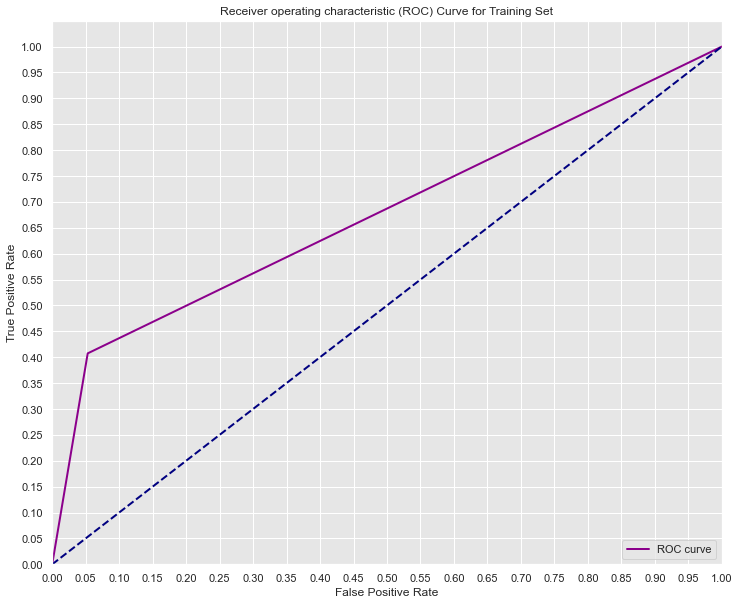

In [58]:
# Plotting ROC using seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 0.6815198915324531



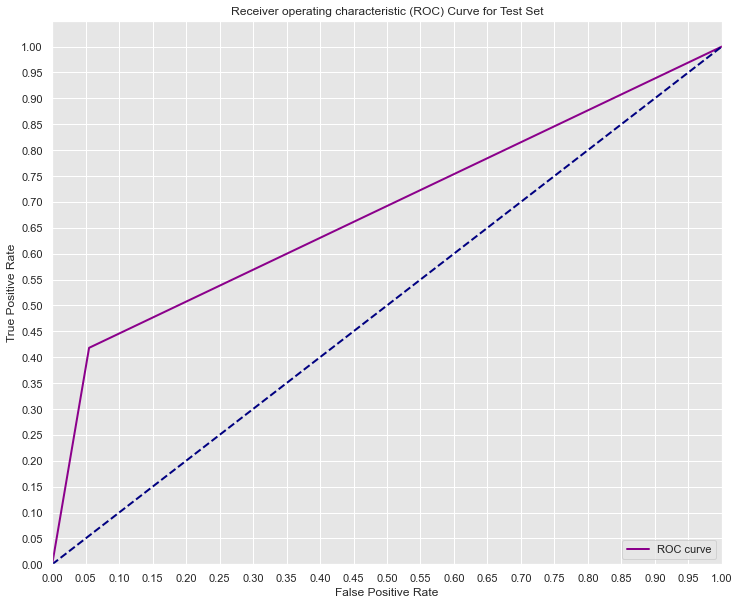

In [59]:
# ROC curve for test set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

It will be noted that the test AUC is greater than the training auc. This could indicate overfitting and this does not allow the model to generalize over new data set. To resolve this, Bagging processes are carried out on the Decision Tree to reduce the variance of a single model and improve its generalization performance.

In [60]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        min_samples_split=1,
                                                        min_samples_leaf=3),n_estimators=20)

In [61]:
# Fit to the training data
bagged_tree.fit(complete_X_train_transformed, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=5,
                                                   min_samples_leaf=3,
                                                   min_samples_split=1),
                  n_estimators=20)

In [62]:
#Make predictions for test data
y_pred_bagged = bagged_tree.predict(complete_X_test_transformed) 
print(classification_report(y_test,y_pred_bagged))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_bagged))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4194
           1       0.68      0.42      0.52      1148

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342


Confusion Matrix
----------------
[[3965  229]
 [ 664  484]]


After bagging the data, it will be noted that the accuracy score increased form and 83.17% to 83.25%.Moreover, the recall also increased to is 69%,the f1 score 71% remained the same and the precision decreased to 77%.

In [63]:
# Calculate the probability scores of each point in the training set
y_train_bagged = bagged_tree.predict_proba(complete_X_train_transformed)
y_train_bagged_fin = np.argmax(y_train_bagged, axis=1)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_bagged_fin)

# Calculate the probability scores of each point in the test set
y_test_bagged = bagged_tree.predict_proba(complete_X_test_transformed)
y_test_bagged_fin = np.argmax(y_test_bagged, axis=1)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_bagged_fin)

Training AUC: 0.6798164228890506


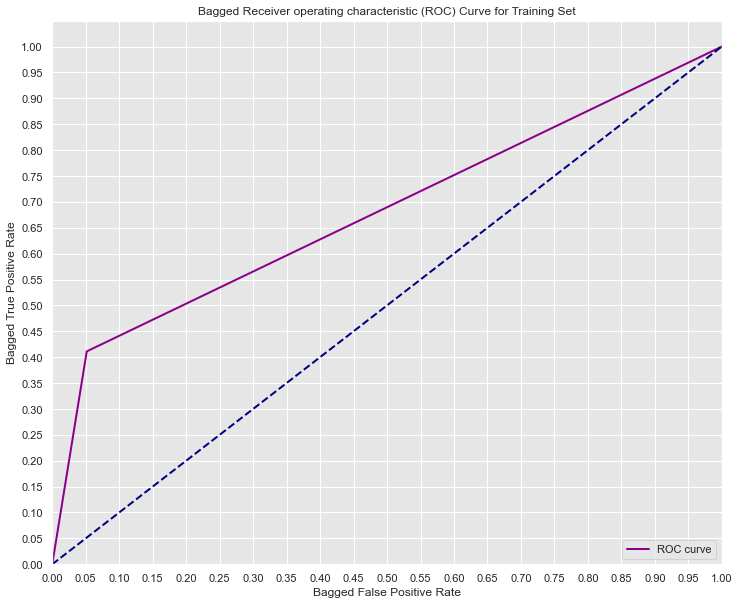

In [64]:
# Plotting ROC using seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Bagged False Positive Rate')
plt.ylabel('Bagged True Positive Rate')
plt.title('Bagged Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 0.683500487671952



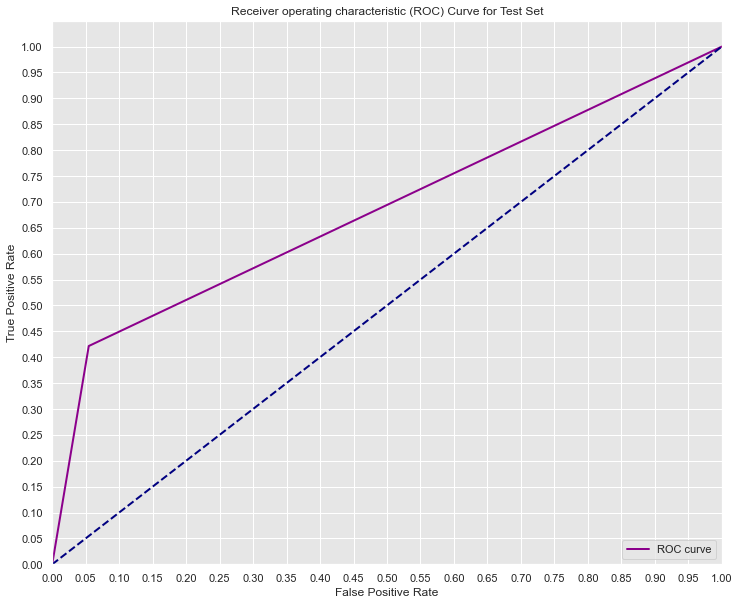

In [65]:
# ROC curve for test set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

It can be noticed that the accuracy score greatly increases from 76.17% to 83.57%. This is a fairly good accuracy score and no further tuning will be done. Additionally, both AUC's improve by a small percentage. Now, let us create another model with Random forest and check if a further imporvement can be made. 

### 7.3 Random forest 

In [66]:
# Instantiate and fit a RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(complete_X_train_transformed, y_train)

RandomForestClassifier(max_depth=5)

In [67]:
# Make predictions for test data

y_pred_forest = forest.predict(complete_X_test_transformed) 
print(classification_report(y_test,y_pred_forest))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4194
           1       0.73      0.33      0.45      1148

    accuracy                           0.83      5342
   macro avg       0.78      0.65      0.67      5342
weighted avg       0.82      0.83      0.80      5342


Confusion Matrix
----------------
[[4053  141]
 [ 773  375]]


From the classification report above it will be noted that the accuracy is 83.17%. Moreover, the recall  is 66%, precision 78% and f1 score 69%.

In [68]:
# Calculate the probability scores of each point in the training set
y_train_forest = forest.predict_proba(complete_X_train_transformed)
y_train_forest_fin = np.argmax(y_train_forest, axis=1)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_forest_fin)

# Calculate the probability scores of each point in the test set
y_test_forest = forest.predict_proba(complete_X_test_transformed)
y_test_forest_fin = np.argmax(y_test_forest, axis=1)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_forest_fin )

Training AUC: 0.6415437465427628


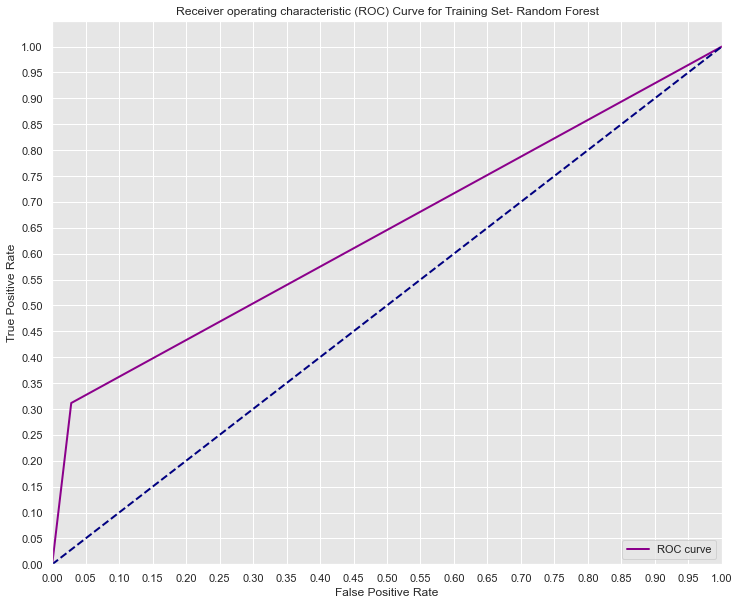

In [69]:
# Plotting ROC using seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set- Random Forest')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 0.6465177979492854



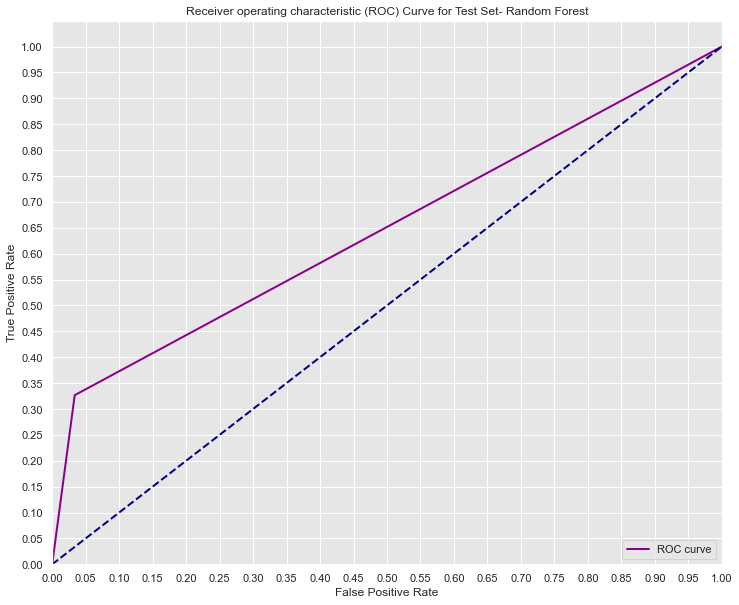

In [70]:
# ROC curve for test set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set- Random Forest')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

While these scores are fairly good however they can be imporved  hyperparameter tuning.

In [72]:
# Define the hyperparameters to tune and the possible values for each hyperparameter
rf_param_grid = {'n_estimators': [250, 500, 750],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]}

#Use GridSearchCV to perform a grid search with cross-validation
grid_search = GridSearchCV(forest, rf_param_grid, cv=3, scoring='accuracy')
grid_search.fit(complete_X_train_transformed, y_train)

grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 250}

The best parameters are as follows {'max_depth': 7,'min_samples_leaf': 3,'min_samples_split': 4,'n_estimators': 250}. 

In [73]:
# Insantiating the model with the best parameters from grid search

rf_tuned = RandomForestClassifier(n_estimators = 250, 
                                  max_depth=7,
                                 min_samples_split=4,
                                 min_samples_leaf=3)

# fitting the model to the training data

rf_tuned.fit(complete_X_train_transformed, y_train) 

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=250)

In [74]:
#Make predictions for test data
y_pred_rftuned = rf_tuned.predict(complete_X_test_transformed) 
print(classification_report(y_test,y_pred_rftuned))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_rftuned))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4194
           1       0.70      0.39      0.50      1148

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342


Confusion Matrix
----------------
[[4000  194]
 [ 699  449]]


After hyperparameter tuning it is noted that the accuracy remains the same at 83.17%. Moreover, the recall increases to 67% and the f1 score to 70% while precision decreases to 77%.

In [75]:
# Calculate the probability scores of each point in the training set
y_train_rftuned = rf_tuned.predict_proba(complete_X_train_transformed)
y_train_rftuned_fin = np.argmax(y_train_rftuned, axis=1)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_rftuned_fin)

# Calculate the probability scores of each point in the test set
y_test_rftuned = rf_tuned.predict_proba(complete_X_test_transformed)
y_test_rftuned_fin = np.argmax(y_test_rftuned, axis=1)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_rftuned_fin )

Training AUC: 0.6766176773260378


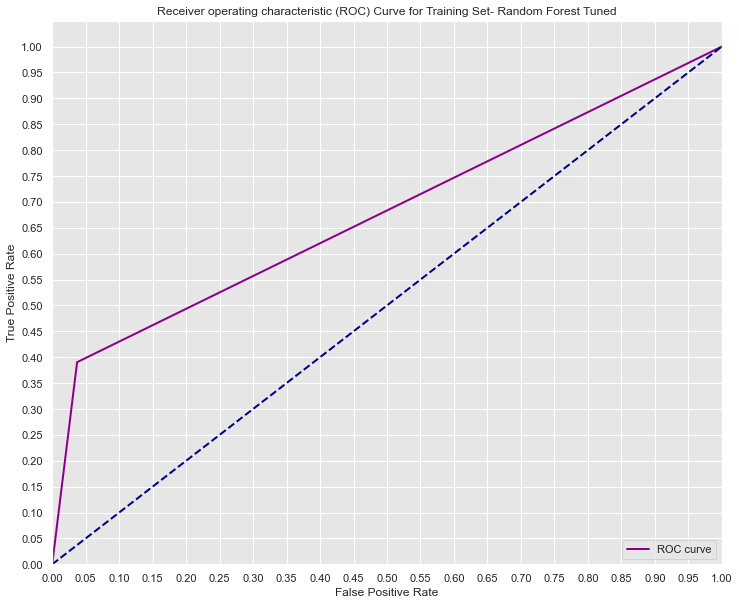

In [76]:
# Plotting ROC using seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set- Random Forest Tuned')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 0.6724292127961133



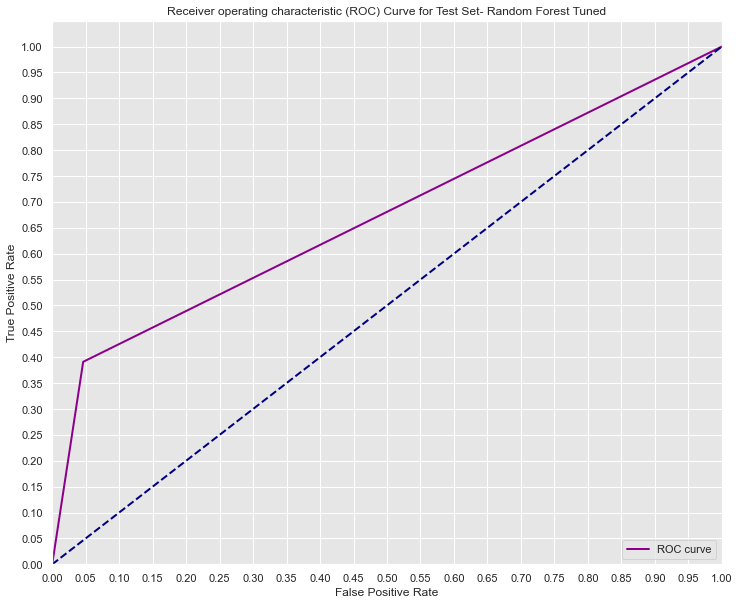

In [77]:
# ROC curve for test set
plt.figure(figsize=(12, 10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkmagenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set- Random Forest Tuned')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

### 7.4 Support Vector Machine (SVM)

In [78]:
# Training a SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(complete_X_train_transformed, y_train)

SVC()

In [79]:
# Make predictions for test data
y_pred_SVM = svm_classifier.predict(complete_X_test_transformed)  

print(classification_report(y_test,y_pred_SVM))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4194
           1       0.68      0.44      0.53      1148

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342


Confusion Matrix
----------------
[[3964  230]
 [ 648  500]]


Using the Random Forest, the precision is 77%, recall is 69% ,f1 is 72% and the accuracy is 84%. These scores are fairly good however they can be imporved hyperparameter tuning.

In [80]:
# Check for thE default hyperparemeters
svc = SVC()
params_svm = svc.get_params()
params_svm_df = pd.DataFrame(params_svm, index=[0])
params_svm_df.T

,0
C,1
break_ties,False
cache_size,200
class_weight,None
coef0,0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [82]:
# Using GridSearchCV to tune the svm hyperparamenters

param_grid_svm = {'C': [0.1,1,10,100],
    'gamma': [ 0.01,0.1,1,10],
    'kernel': ['rbf']}

# svm_param = GridSearchCV(SVC(), param_grid_svm, refit = True, verbose = 3)
# svm_param.fit(complete_X_train_transformed, y_train)

# svm_param.best_params_

# print(svm_param.best_params_)
# print(svm_param.best_estimator_)


The best parameters are as follows {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} SVC(C=100, gamma=0.01). The cell used to determine this has been commented out as the run-time is very long. 

In [83]:
svm_tuned = SVC(C=100, gamma=0.01, kernel='rbf')
svm_tuned.fit(complete_X_train_transformed, y_train)
y_pred_SVMtuned = svm_tuned.predict(complete_X_test_transformed)  
print(classification_report(y_test,y_pred_SVMtuned))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_SVMtuned))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4194
           1       0.68      0.42      0.52      1148

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342


Confusion Matrix
----------------
[[3963  231]
 [ 664  484]]


Using the Random Forest, the recall decreases to 68%, accuracy to 83% and f1 to 71%. On the other hand, precision remains the same at 77%.

In [84]:
# Using RandomizedSearchCV to tune the svm hyperparamenters

param_rand_svm = {'C': scipy.stats.expon(scale=.01),
    'gamma': scipy.stats.expon(scale=.01),
    'kernel': ['rbf'], 'random_state' :[1]}

# svm_param_rand = RandomizedSearchCV(SVC(), param_rand_svm, refit = True, verbose = 3)
# svm_param_rand.fit(complete_X_train_transformed, y_train)

# svm_param_rand.best_params_

# print(svm_param_rand.best_params_)
# print(svm_param_rand.best_estimator_)


 From the RandomizedSearchCV the following hyperparamenters were extracted as the best {'C': 0.002620046963462148, 'gamma': 0.00409833143228742, 'kernel': 'rbf', 'random_state': 1}
SVC(C=0.002620046963462148, gamma=0.00409833143228742, random_state=1).

In [85]:
# Checking the precision, recall and accuracy score
svm_tuned = SVC(C=0.002620046963462148, gamma=0.00409833143228742, kernel='rbf',random_state=1)
svm_tuned.fit(complete_X_train_transformed, y_train)
y_pred_SVMtuned = svm_tuned.predict(complete_X_test_transformed)  
print(classification_report(y_test,y_pred_SVMtuned))
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_pred_SVMtuned))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4194
           1       0.00      0.00      0.00      1148

    accuracy                           0.79      5342
   macro avg       0.39      0.50      0.44      5342
weighted avg       0.62      0.79      0.69      5342


Confusion Matrix
----------------
[[4194    0]
 [1148    0]]


From the classification report we note that the precision, recall, f1 and accuracy scores have significantly decreased. This however does not disqulify the tuned model.

## 8. Observations on the trained models

|Model | Accuracy | Precision | Recall | F1 |
|:--- |:--- |:--- |:--- |:--- |
|Decision Tree| 83% |76% |68% |71% |
|Random Forest| 83% |78% |67% |70% |
|SVM| 83% |77% |68% |71% |

The table above shows a summary of the various scores from the best working models. 
It is important to establish what score is more compatible with the data set on the H1N1 vaccine. As discussed earlier, this model will be used by governments and NGOs during vaccine drives to better help them plan their resources better and even carry out awareness campaigns.
During such preparations, it would be crucial to ensure that resources are not wasted and that teh campaigns have an impact. It is for this reasons that **precision** is important as maximizing precision will minimize number of false positives which could lead to resource wasting. 

However, the precision scores are pretty close and thus the **recall** score will also guide in selecting a model. From a careful review of the table, SVM presents a well balanced scores and would serve the purpose of accurately predicting whether or not individuals would get vaccinated.

## 9. Conclusions

i. The tuned SVM model is the best model for predicting whether or not individuals would get vaccinated.

ii. doctor_recc_h1n1 is a very important feature in determining the target variable. 

iii. Female respondents who are vaccinated are more than males.

iv. A highter number of 65+ Years old respondents are vaccinated compared to other age groups.

v. A highter number of employed respondents are vaccinated compared to other respondents.

vi. A highter number of white respondents are vaccinated compared to other races.

vii. v. A highter number of married respondents are vaccinated compared to other respondents.

## 10. Recommendations

i. The stakeholders (government and NGOs) should consider conducting mass education through awareness campaigns to reduce vaccine hesitation.

ii.The stakeholders should work with hospitals to encourage vaccine uptake through doctors recommendations.

iii.The stakeholders should focus on educating younger age groups on the importance of vaccinations. 



## 11. Future improvement Ideas

1.Building a pipeline for this model.

2.Tuning the Random Forest classifier with a larger range. 